In [79]:
import re
import pandas as pd

In [80]:
f = open('WhatsApp Chat with Anjali.txt','r',encoding='utf-8')

In [81]:
data = f.read()

In [82]:
f.close()

In [83]:
print(data)

26/10/21, 6:27 pm - Vishal: aa to skti ho bt abhi bhaiya tumse milenge ni
26/10/21, 6:27 pm - Anjali: serious na ho
26/10/21, 6:28 pm - Anjali: bs aise hi khyls aaye
26/10/21, 6:28 pm - Anjali: to baat kr rha
26/10/21, 6:28 pm - Anjali: koi alag type ka kya same
26/10/21, 6:28 pm - Vishal: hmm jb aisa ho skega to mai khud hi ni bolunga tumhe pgl
26/10/21, 6:28 pm - Vishal: na naatu bnayega aaj normal wala
26/10/21, 6:28 pm - Anjali: oks
26/10/21, 6:29 pm - Anjali: mumma kaise hain??
26/10/21, 6:29 pm - Vishal: achi hain
26/10/21, 6:29 pm - Vishal: subeh hi baat hui thi
26/10/21, 6:29 pm - Vishal: uske baad ni hui
26/10/21, 6:29 pm - Anjali: yo, i miss these types of days
26/10/21, 6:29 pm - Anjali: i know tum log k liye normal din jaisa h
26/10/21, 6:31 pm - Vishal: hmm bt jaise hi ye possible hoga to tumhe bolna ni pdega mai khud hi bolunga tumhe ki aa jao
26/10/21, 6:32 pm - Anjali: yo
26/10/21, 6:32 pm - Vishal: waha sab theek?
26/10/21, 6:32 pm - Vishal: waha kya ban rha aaj?
26/10

In [85]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s\D{2}\s-\s'

In [86]:
messages = re.split(pattern, data)[1:]

In [69]:
re.split(pattern, data)[1:]

['Vishal: na naatu bnayega aaj normal wala\n',
 'Anjali: oks\n',
 'Anjali: mumma kaise hain??\n',
 'Vishal: achi hain\n',
 'Vishal: subeh hi baat hui thi\n',
 'Vishal: uske baad ni hui\n',
 'Anjali: yo, i miss these types of days\n',
 'Anjali: i know tum log k liye normal din jaisa h\n',
 'Vishal: hmm bt jaise hi ye possible hoga to tumhe bolna ni pdega mai khud hi bolunga tumhe ki aa jao\n',
 'Anjali: yo\n',
 'Vishal: waha sab theek?\n',
 'Vishal: waha kya ban rha aaj?\n',
 'Anjali: han\n',
 'Anjali: kuch ni\n',
 'Anjali: aaj kisi ka maan ni\n',
 'Anjali: kuch khane ka\n',
 'Anjali: bs paa ka bnega\n',
 'Vishal: are abhi ni bt raat tk to lg hi jayegi bhukh sbko\n',
 'Anjali: ni as much\n',
 'Anjali: abi to jo window k upr gir gya tha\n',
 'Anjali: usko theek krne bhaiya aaye hain\n',
 'Vishal: Ohh\n',
 'Vishal: Theek karwane me lge ho abhi?\n',
 'Anjali: Ni bs utna hi\n',
 'Anjali: Qki vo bohot gir rha h\n',
 'Vishal: To bathroom wala?\n',
 'Anjali: Vo sab ni\n',
 'Anjali: Vo sab\n',


In [87]:
len(messages)

39999

In [88]:
dates = re.findall(pattern, data)

In [89]:
df = pd.DataFrame({'user_message':messages, 'message_date':dates})

In [90]:
df.head(5)

,user_message,message_date
0,Vishal: aa to skti ho bt abhi bhaiya tumse mil...,"26/10/21, 6:27 pm -"
1,Anjali: serious na ho\n,"26/10/21, 6:27 pm -"
2,Anjali: bs aise hi khyls aaye\n,"26/10/21, 6:28 pm -"
3,Anjali: to baat kr rha\n,"26/10/21, 6:28 pm -"
4,Anjali: koi alag type ka kya same\n,"26/10/21, 6:28 pm -"


In [92]:
# convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %I:%M %p - ')

In [93]:
df.rename(columns= {'message_date': 'date'}, inplace=True)

In [94]:
df.head()

,user_message,date
0,Vishal: aa to skti ho bt abhi bhaiya tumse mil...,2021-10-26 18:27:00
1,Anjali: serious na ho\n,2021-10-26 18:27:00
2,Anjali: bs aise hi khyls aaye\n,2021-10-26 18:28:00
3,Anjali: to baat kr rha\n,2021-10-26 18:28:00
4,Anjali: koi alag type ka kya same\n,2021-10-26 18:28:00


In [95]:
df.shape

(39999, 2)

In [102]:
# separate users & messages
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]: # user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
        
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2021-10-26 18:27:00,Vishal,aa to skti ho bt abhi bhaiya tumse milenge ni\n
1,2021-10-26 18:27:00,Anjali,serious na ho\n
2,2021-10-26 18:28:00,Anjali,bs aise hi khyls aaye\n
3,2021-10-26 18:28:00,Anjali,to baat kr rha\n
4,2021-10-26 18:28:00,Anjali,koi alag type ka kya same\n


In [103]:
df['year'] = df['date'].dt.year

In [104]:
df.head()

,date,user,message,year
0,2021-10-26 18:27:00,Vishal,aa to skti ho bt abhi bhaiya tumse milenge ni\n,2021
1,2021-10-26 18:27:00,Anjali,serious na ho\n,2021
2,2021-10-26 18:28:00,Anjali,bs aise hi khyls aaye\n,2021
3,2021-10-26 18:28:00,Anjali,to baat kr rha\n,2021
4,2021-10-26 18:28:00,Anjali,koi alag type ka kya same\n,2021


In [105]:
df['month'] = df['date'].dt.month_name()

df['day'] = df['date'].dt.day

df['hour'] = df['date'].dt.hour

df['minute'] = df['date'].dt.minute

In [112]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2021-10-26 18:27:00,Vishal,aa to skti ho bt abhi bhaiya tumse milenge ni\n,2021,October,26,18,27
1,2021-10-26 18:27:00,Anjali,serious na ho\n,2021,October,26,18,27
2,2021-10-26 18:28:00,Anjali,bs aise hi khyls aaye\n,2021,October,26,18,28
3,2021-10-26 18:28:00,Anjali,to baat kr rha\n,2021,October,26,18,28
4,2021-10-26 18:28:00,Anjali,koi alag type ka kya same\n,2021,October,26,18,28


In [115]:
words = []
for message in df['message']:
    words.append(message.split())

In [116]:
len(words)

39999

In [117]:
words

[['aa', 'to', 'skti', 'ho', 'bt', 'abhi', 'bhaiya', 'tumse', 'milenge', 'ni'],
 ['serious', 'na', 'ho'],
 ['bs', 'aise', 'hi', 'khyls', 'aaye'],
 ['to', 'baat', 'kr', 'rha'],
 ['koi', 'alag', 'type', 'ka', 'kya', 'same'],
 ['hmm',
  'jb',
  'aisa',
  'ho',
  'skega',
  'to',
  'mai',
  'khud',
  'hi',
  'ni',
  'bolunga',
  'tumhe',
  'pgl'],
 ['na', 'naatu', 'bnayega', 'aaj', 'normal', 'wala'],
 ['oks'],
 ['mumma', 'kaise', 'hain??'],
 ['achi', 'hain'],
 ['subeh', 'hi', 'baat', 'hui', 'thi'],
 ['uske', 'baad', 'ni', 'hui'],
 ['yo,', 'i', 'miss', 'these', 'types', 'of', 'days'],
 ['i', 'know', 'tum', 'log', 'k', 'liye', 'normal', 'din', 'jaisa', 'h'],
 ['hmm',
  'bt',
  'jaise',
  'hi',
  'ye',
  'possible',
  'hoga',
  'to',
  'tumhe',
  'bolna',
  'ni',
  'pdega',
  'mai',
  'khud',
  'hi',
  'bolunga',
  'tumhe',
  'ki',
  'aa',
  'jao'],
 ['yo'],
 ['waha', 'sab', 'theek?'],
 ['waha', 'kya', 'ban', 'rha', 'aaj?'],
 ['han'],
 ['kuch', 'ni'],
 ['aaj', 'kisi', 'ka', 'maan', 'ni'],
 ['k

In [122]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls('hey do you know about google.com or www.facebook.com')
urls

['google.com', 'www.facebook.com']

In [123]:
links = []

for message in df['message']:
    links.extend(extractor.find_urls(message))

In [124]:
len(links)

78

In [130]:
 x = df['user'].value_counts().head()

In [128]:
import matplotlib.pyplot as plt

In [131]:
name = x.index
count = x.values

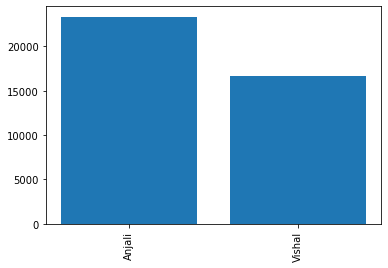

In [132]:
plt.bar(name, count)
plt.xticks(rotation='vertical')
plt.show();

In [133]:
round(df['user'].value_counts()/df.shape[0]*100,2).reset_index().rename(columns={'index':'name',
                                                                                'user':'percent'})

,name,percent
0,Anjali,58.38
1,Vishal,41.62


In [159]:
temp = df[df['user'] != 'group notification']
temp = temp[temp['message'] != '<Media omitted>\n'].reset_index()

In [161]:
f = open('stop_hinglish.txt', 'r')
stop_words = f.read()
print(stop_words)
f.close()

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [167]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [168]:
words

['skti',
 'bhaiya',
 'tumse',
 'milenge',
 'khyls',
 'baat',
 'type',
 'jb',
 'skega',
 'bolunga',
 'tumhe',
 'pgl',
 'naatu',
 'bnayega',
 'mumma',
 'hain??',
 'achi',
 'subeh',
 'baat',
 'yo,',
 'miss',
 'types',
 'days',
 'possible',
 'tumhe',
 'bolna',
 'pdega',
 'bolunga',
 'tumhe',
 'jao',
 'theek?',
 'aaj?',
 'khane',
 'paa',
 'bnega',
 'raat',
 'tk',
 'lg',
 'jayegi',
 'bhukh',
 'sbko',
 'abi',
 'window',
 'upr',
 'gir',
 'gya',
 'usko',
 'bhaiya',
 'ohh',
 'karwane',
 'lge',
 'abhi?',
 'utna',
 'qki',
 'gir',
 'bathroom',
 'wala?',
 'kraungi',
 'kra',
 'paaya',
 'cried',
 'felt',
 'upset',
 'kya?',
 'upset',
 'feeling',
 'disappointed',
 'pta',
 'chala?',
 'ghr',
 'dasha',
 'jarjar',
 'dekhkr',
 'beta',
 'dheere',
 'dheere',
 'tumhe',
 'seekhna',
 'skill',
 'smjh',
 'meko',
 'psnd',
 'abi?',
 'pasand',
 'baat',
 'job',
 'aage',
 'badhne',
 'padhna',
 'skti',
 'resume',
 'bna',
 'baat',
 'skta',
 'bna',
 'bd',
 'krte',
 'bie',
 'krlo',
 'aaram',
 'focus',
 'hokr',
 'khana',
 'g

In [169]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,baat,1502
1,yr,1310
2,paa,982
3,jb,662
4,gya,660
5,tumko,610
6,tk,554
7,pta,527
8,tb,506
9,qki,498


In [ ]:
# Remove Group Messages
# remove media omitted message
# remove stop words

In [170]:
!pip install emoji

  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=4ee093fd22520872f798238a744bde7c9798f7ddbc5460bea3b6f69dd3fa4e0f
  Stored in directory: c:\users\truefan\appdata\local\pip\cache\wheels\fa\7a\e9\22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
Successfully built emoji


In [171]:
import emoji

In [172]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])
    

In [173]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😘,200
1,😅,153
2,🤣,92
3,🏻,77
4,♀,77
...,...,...
105,🧐,1
106,🫠,1
107,🥹,1
108,🫥,1


In [174]:
df['month_num'] = df['date'].dt.month

In [175]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num
0,2021-10-26 18:27:00,Vishal,aa to skti ho bt abhi bhaiya tumse milenge ni\n,2021,October,26,18,27,10
1,2021-10-26 18:27:00,Anjali,serious na ho\n,2021,October,26,18,27,10
2,2021-10-26 18:28:00,Anjali,bs aise hi khyls aaye\n,2021,October,26,18,28,10
3,2021-10-26 18:28:00,Anjali,to baat kr rha\n,2021,October,26,18,28,10
4,2021-10-26 18:28:00,Anjali,koi alag type ka kya same\n,2021,October,26,18,28,10


In [180]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [181]:
timeline

,year,month_num,month,message
0,2021,10,October,1128
1,2021,11,November,9214
2,2021,12,December,6518
3,2022,1,January,6889
4,2022,2,February,6531
5,2022,3,March,5727
6,2022,4,April,2172
7,2022,5,May,1820


In [187]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + '-' + str(timeline['year'][i]))

In [189]:
timeline['time'] = time

In [190]:
timeline

,year,month_num,month,message,time
0,2021,10,October,1128,October-2021
1,2021,11,November,9214,November-2021
2,2021,12,December,6518,December-2021
3,2022,1,January,6889,January-2022
4,2022,2,February,6531,February-2022
5,2022,3,March,5727,March-2022
6,2022,4,April,2172,April-2022
7,2022,5,May,1820,May-2022


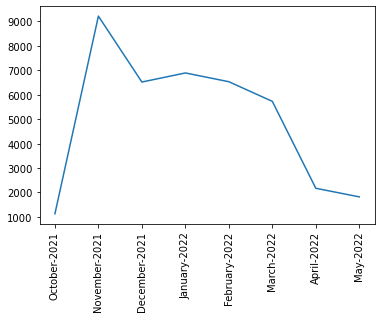

In [192]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')
plt.show();

In [193]:
df['day_name'] = df['date'].dt.day_name()

In [194]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,day_name
0,2021-10-26 18:27:00,Vishal,aa to skti ho bt abhi bhaiya tumse milenge ni\n,2021,October,26,18,27,10,Tuesday
1,2021-10-26 18:27:00,Anjali,serious na ho\n,2021,October,26,18,27,10,Tuesday
2,2021-10-26 18:28:00,Anjali,bs aise hi khyls aaye\n,2021,October,26,18,28,10,Tuesday
3,2021-10-26 18:28:00,Anjali,to baat kr rha\n,2021,October,26,18,28,10,Tuesday
4,2021-10-26 18:28:00,Anjali,koi alag type ka kya same\n,2021,October,26,18,28,10,Tuesday


In [195]:
df['day_name'].value_counts()

Sunday       8192
Monday       6095
Saturday     5876
Wednesday    5598
Thursday     5126
Friday       4630
Tuesday      4482
Name: day_name, dtype: int64

In [196]:
df['month'].value_counts()

November    9214
January     6889
February    6531
December    6518
March       5727
April       2172
May         1820
October     1128
Name: month, dtype: int64

In [197]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + '-' + str('00'))
    elif hour == 0:
        period.append(str('00') + '-' + str(hour+1))
    else:
        period.append(str(hour) + '-' + str(hour+1))

In [198]:
df['period'] = period

In [199]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,day_name,period
8875,2021-11-27 23:47:00,Anjali,N i want u to understand it without me being t...,2021,November,27,23,47,11,Saturday,23-00
13613,2021-12-09 19:56:00,Anjali,Jaisa b h....\n,2021,December,9,19,56,12,Thursday,19-20
7206,2021-11-22 19:02:00,Anjali,Tbhi krna\n,2021,November,22,19,2,11,Monday,19-20
4801,2021-11-12 19:29:00,Vishal,paa whatsapp pe 3835 wale number se hain\n,2021,November,12,19,29,11,Friday,19-20
7879,2021-11-24 20:06:00,Vishal,check kr lo kuch gadbad to ni h na\n,2021,November,24,20,6,11,Wednesday,20-21


In [201]:
!pip install seaborn

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-utils 0.0.15 requires statsmodels, which is not installed.
dtale 2.2.0 requires et-xmlfile; python_version >= "3.6", which is not installed.
dtale 2.2.0 requires itsdangerous; python_version >= "3.7", which is not installed.
dtale 2.2.0 requires networkx; python_version >= "3.0", which is not installed.
dtale 2.2.0 requires openpyxl; python_version >= "3.0", which is not installed.
dtale 2.2.0 requires statsmodels; python_version > "3.7", which is not installed.
dtale 2.2.0 requires xlrd, which is not installed.
pandas-profiling 3.1.0 requires joblib~=1.0.1, but you have joblib 1.1.0 which is incompatible.
dtale 2.2.0 requires scikit-learn==0.24.2; python_version > "3.0", but you have scikit-learn 1.1.1 which is incompatible.


  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


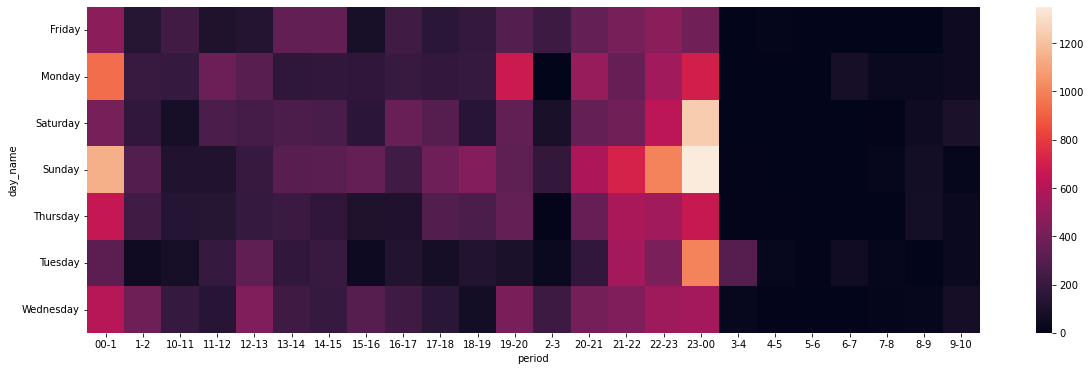

In [203]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show();

In [204]:
df.pivot_table(index='day_name', columns='period', values='message',aggfunc='count').fillna(0)

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,21-22,22-23,23-00,3-4,4-5,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,472.0,139.0,235.0,108.0,130.0,343.0,345.0,85.0,227.0,153.0,...,407.0,465.0,394.0,2.0,15.0,0.0,0.0,2.0,5.0,46.0
Monday,939.0,205.0,190.0,371.0,313.0,164.0,176.0,173.0,205.0,181.0,...,354.0,543.0,699.0,0.0,3.0,2.0,84.0,36.0,37.0,45.0
Saturday,408.0,175.0,80.0,264.0,246.0,271.0,262.0,156.0,364.0,306.0,...,391.0,627.0,1237.0,3.0,5.0,0.0,1.0,9.0,49.0,96.0
Sunday,1144.0,288.0,119.0,117.0,200.0,316.0,318.0,353.0,228.0,382.0,...,713.0,1001.0,1351.0,9.0,1.0,0.0,5.0,17.0,68.0,21.0
Thursday,651.0,230.0,136.0,142.0,192.0,208.0,173.0,106.0,115.0,287.0,...,573.0,540.0,664.0,6.0,6.0,5.0,0.0,4.0,71.0,37.0
Tuesday,325.0,58.0,80.0,190.0,334.0,177.0,201.0,47.0,126.0,77.0,...,549.0,420.0,1000.0,302.0,25.0,9.0,62.0,20.0,0.0,42.0
Wednesday,607.0,379.0,190.0,143.0,434.0,223.0,191.0,303.0,223.0,153.0,...,434.0,528.0,550.0,26.0,7.0,0.0,0.0,13.0,16.0,77.0
